In [1]:
from asgardpy.analysis import AsgardpyAnalysis
from asgardpy.config import AsgardpyConfig
from asgardpy.utils.plot import (
    plot_parameter_stat_profile,
    plot_spectrum_fp,
    plot_spectrum_model
)
from gammapy.modeling.models import Models, create_crab_spectral_model
import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u

In [2]:
base_dir = "/fefs/aswg/workspace/chaitanya.priyadarshi/"
config_file = base_dir + "analyze_pg1553_full.yaml"
output_dir = base_dir + "real_data/AGN/PG1553/v09x/tailcut84/DL3/interp_irf_en_dep/no_tuning/geff_80/teff_80/20220511_dec931/joint_fit/"

In [3]:
config = AsgardpyConfig()

In [4]:
config_main = config.read(config_file)

In [5]:
for g in config_main.general:
    print(g)

('log', LogConfig(level='info', filename=None, filemode=None, format=None, datefmt=None))
('outdir', '/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/PG1553/v09x/tailcut84/DL3/interp_irf_en_dep/no_tuning/geff_80/teff_80/20220511_dec931/joint_fit/')
('n_jobs', 1)
('steps', [<AnalysisStepEnum.datasets_3d: 'datasets-3d'>, <AnalysisStepEnum.datasets_1d: 'datasets-1d'>, <AnalysisStepEnum.fit: 'fit'>, <AnalysisStepEnum.flux_points: 'flux-points'>])
('overwrite', True)
('stacked_dataset', True)


# Steps mentioned in the main config file

In [6]:
config_main.general.steps

[<AnalysisStepEnum.datasets_3d: 'datasets-3d'>,
 <AnalysisStepEnum.datasets_1d: 'datasets-1d'>,
 <AnalysisStepEnum.fit: 'fit'>,
 <AnalysisStepEnum.flux_points: 'flux-points'>]

# Target source information

In [7]:
for c in config_main.target:
    print(c)

('source_name', 'PG1553+113')
('sky_position', SkyCoordConfig(frame=<FrameEnum.icrs: 'icrs'>, lon=<Angle 238.92934976 deg>, lat=<Angle 11.19010155 deg>))
('use_uniform_position', True)
('models_file', None)
('extended', False)
('components', SkyModelComponent(name='PG1553+113', type='SkyModel', spectral=SpectralModelConfig(model_name='LogParabola', type='LogParabolaSpectralModel', parameters=[ModelParams(name='amplitude', value=8e-06, unit='cm-2 s-1 TeV-1', error=1.5e-06, min=0.0, max=0.01, frozen=False), ModelParams(name='reference', value=0.01, unit='TeV', error=0.0, min=0.0001, max=100.0, frozen=True), ModelParams(name='alpha', value=1.5, unit='', error=0.1, min=0.5, max=5.0, frozen=False), ModelParams(name='beta', value=0.2, unit='', error=0.01, min=0.0, max=1.0, frozen=False)], ebl_abs=EBLAbsorptionModel(model_name='dominguez', type='EBLAbsorptionNormSpectralModel', redshift=0.433, alpha_norm=1.0)), spatial=SpatialModelConfig(model_name=None, type=None, parameters=[ModelParams(nam

# Datasets informations

In [8]:
for cc in config_main.dataset3d:
    print(cc)

('type', <ReductionTypeEnum.cube: '3d'>)
('instruments', [Dataset3DBaseConfig(name='Fermi-LAT', io=[InputConfig(type='lat', input_dir=PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/PG1553+113/Analysis1/EBL/LogParabola'), glob_pattern={'events': '*MkTime.fits*', 'edisp': '*eDRM.fits*', 'xml_model': '*out.xml', 'exposure': '*BinnedMap.fits*', 'psf': '*psf.fits*'}), InputConfig(type='lat-aux', input_dir=PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/diffuse_models'), glob_pattern={'diffuse': 'gll_iem_v07.fits*', 'iso': 'iso_P8R3_SOURCE_V3_*.txt'})], dataset_info=Dataset3DInfoConfig(name='Fermi-LAT', key=['FRONT', 'BACK'], map_selection=[<MapSelectionEnum.counts: 'counts'>, <MapSelectionEnum.exposure: 'exposure'>, <MapSelectionEnum.background: 'background'>, <MapSelectionEnum.psf: 'psf'>, <MapSelectionEnum.edisp: 'edisp'>], obs_time=TimeIntervalsConfig(format=<TimeFormatEnum.iso: 'iso'>, intervals=[TimeRangeConfig(start=<Time object: scale='utc' format='iso' value=2021-04-01 00:00:

In [9]:
for cc in config_main.dataset1d:
    print(cc)

('type', <ReductionTypeEnum.spectrum: '1d'>)
('instruments', [Dataset1DBaseConfig(name='LST-1', io=[InputConfig(type='lst-1', input_dir=PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/PG1553/v09x/tailcut84/DL3/interp_irf_en_dep/no_tuning/geff_80/teff_80/20220511_dec931'), glob_pattern={'dl3': '202*/dl3*fits'})], dataset_info=Dataset1DInfoConfig(name='LST-1', geom=GeomConfig(wcs=WcsConfig(skydir=SkyCoordConfig(frame=None, lon=None, lat=None), binsize=<Angle 0.02 deg>, final_frame=FinalFrameConfig(width=<Angle 5. deg>, height=<Angle 5. deg>), binsize_irf=<Angle 0.2 deg>), selection=SelectionConfig(offset_max=<Angle 2.5 deg>), axes=EnergyAxesConfig(energy=EnergyAxisConfig(min=<Quantity 10. GeV>, max=<Quantity 10. TeV>, nbins=5), energy_true=EnergyAxisConfig(min=<Quantity 10. GeV>, max=<Quantity 10. TeV>, nbins=5))), observation=ObservationsConfig(obs_ids=[], obs_file=None, obs_time=TimeIntervalsConfig(format=<TimeFormatEnum.iso: 'iso'>, intervals=[TimeRangeConfig(start

In [10]:
for cc in config_main.fit_params:
    print(cc)

('fit_range', EnergyRangeConfig(min=<Quantity 100. MeV>, max=<Quantity 10. TeV>))
('backend', <BackendEnum.minuit: 'minuit'>)
('optimize_opts', {})
('covariance_opts', {})
('confidence_opts', {})
('store_trace', True)


In [11]:
analysis = AsgardpyAnalysis(config_main)

Setting logging config: {'level': 'INFO', 'filename': None, 'filemode': None, 'format': None, 'datefmt': None}


In [12]:
analysis

# Run all the steps

In [13]:
%%time
analysis.run()

1 number of 3D Datasets given
The different keys used: ['FRONT', 'BACK']
The list of DL3 event files for LAT selected: [PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/PG1553+113/Analysis1/EBL/LogParabola/PG_1553+113_LAT_Analysis_BACK_MkTime.fits.gz'), PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/PG1553+113/Analysis1/EBL/LogParabola/PG_1553+113_LAT_Analysis_FRONT_MkTime.fits.gz')]
The list of Detector Response Matrix files for LAT selected: [PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/PG1553+113/Analysis1/EBL/LogParabola/PG_1553+113_LAT_Analysis_BACK_LogParabola_eDRM.fits.gz'), PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/PG1553+113/Analysis1/EBL/LogParabola/PG_1553+113_LAT_Analysis_FRONT_LogParabola_eDRM.fits.gz')]
The list of XML files for LAT selected: [PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/PG1553+113/Analysis1/EBL/LogParabola/PG_1553+113_LogParabola_LAT_Analysis_out.xml')]
The list of Exposure Map files for LAT selected: [PosixPath('/fefs/aswg/wor

Observation ID list selected: [4333 4334 4335 4336 4343 4344 4363 4364 4365 4366 4367 4368 4514 4515
 4652 4653 4654 4902 4903 4904 4905 4930 4940 4941 4942 4943 7153 7154
 8059 8060 8061 8062 8063 8064 8377 8378 8379 8424 8425]
Observations selected: 39 out of 39.
Analysis Step datasets-1d completed


Assigning the given models to the given datasets


OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 172
	total stat : 34867.29

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

{'components': [{'name': 'PG1553+113', 'type': 'SkyModel', 'spectral': {'type': 'CompoundSpectralModel', 'model1': {'type': 'LogParabolaSpectralModel', 'parameters': [{'name': 'amplitude', 'value': 6.479776074448667e-07, 'unit': 'cm-2 s-1 TeV-1', 'error': 6.918618450064074e-08, 'min': 0.0, 'max': 0.01}, {'name': 'reference', 'value': 0.01, 'unit': 'TeV', 'min': 0.0001, 'max': 100.0}, {'name': 'alpha', 'value': 2.2771077269187963, 'error': 0.021519544431835264, 'min': 0.5, 'max': 5.0}, {'name': 'beta', 'value': 0.023096076484780563, 'error': 0.012588433353857738, 'min': 0.0, 'max': 1.0}]}, 'model2': {'type': 'EBLAbsorptionNormSpectralModel', 'parameters': [{'name': 'alpha_norm', 'value': 1.0}, {'n

CPU times: user 3min 20s, sys: 58.9 s, total: 4min 19s
Wall time: 4min 21s


# Get the final products

In [14]:
for d in analysis.datasets:
    print(d)

MapDataset
----------

  Name                            : Fermi-LAT_FRONT 

  Total counts                    : 544 
  Total background counts         : nan
  Total excess counts             : nan

  Predicted counts                : 287.07
  Predicted background counts     : nan
  Predicted excess counts         : 287.07

  Exposure min                    : 2.13e+08 cm2 s
  Exposure max                    : 7.69e+08 cm2 s

  Number of total bins            : 815121 
  Number of fit bins              : 815121 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : 34855.58

  Number of models                : 1 
  Number of parameters            : 8
  Number of free parameters       : 3

  Component 0: SkyModel
  
    Name                      : PG1553+113
    Datasets names            : None
    Spectral model type       : CompoundSpectralModel
    Spatial  model type       : PointSpatialModel
    Temporal model type       : 
    Parameters:
      amplitude    

In [15]:
for d in analysis.datasets:
    print(d.name)

Fermi-LAT_FRONT
LST-1


In [16]:
analysis.fit_result

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 172
	total stat : 34867.29

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

In [17]:
analysis.final_model.to_dict()

{'components': [{'name': 'PG1553+113',
   'type': 'SkyModel',
   'spectral': {'type': 'CompoundSpectralModel',
    'model1': {'type': 'LogParabolaSpectralModel',
     'parameters': [{'name': 'amplitude',
       'value': 6.479776074448667e-07,
       'unit': 'cm-2 s-1 TeV-1',
       'error': 6.918618450064074e-08,
       'min': 0.0,
       'max': 0.01},
      {'name': 'reference',
       'value': 0.01,
       'unit': 'TeV',
       'min': 0.0001,
       'max': 100.0},
      {'name': 'alpha',
       'value': 2.2771077269187963,
       'error': 0.021519544431835264,
       'min': 0.5,
       'max': 5.0},
      {'name': 'beta',
       'value': 0.023096076484780563,
       'error': 0.012588433353857738,
       'min': 0.0,
       'max': 1.0}]},
    'model2': {'type': 'EBLAbsorptionNormSpectralModel',
     'parameters': [{'name': 'alpha_norm', 'value': 1.0},
      {'name': 'redshift', 'value': 0.43300000000000005}],
     'filename': '/fefs/aswg/workspace/chaitanya.priyadarshi/software/gammapy-

In [18]:
analysis.final_model.parameters.to_table()

type,name,value,unit,error,min,max,frozen,is_norm,link
str8,str10,float64,str14,float64,float64,float64,bool,bool,str1
spectral,amplitude,6.4798e-07,cm-2 s-1 TeV-1,6.919e-08,0.000e+00,1.000e-02,False,True,
spectral,reference,1.0000e-02,TeV,0.000e+00,1.000e-04,1.000e+02,True,False,
spectral,alpha,2.2771e+00,,2.152e-02,5.000e-01,5.000e+00,False,False,
spectral,beta,2.3096e-02,,1.259e-02,0.000e+00,1.000e+00,False,False,
spectral,alpha_norm,1.0000e+00,,0.000e+00,nan,nan,True,False,
spectral,redshift,4.3300e-01,,0.000e+00,nan,nan,True,False,
spatial,lon_0,3.8238e-01,rad,0.000e+00,nan,nan,True,False,
spatial,lat_0,7.6732e-01,rad,0.000e+00,-9.000e+01,9.000e+01,True,False,


<AxesSubplot:>

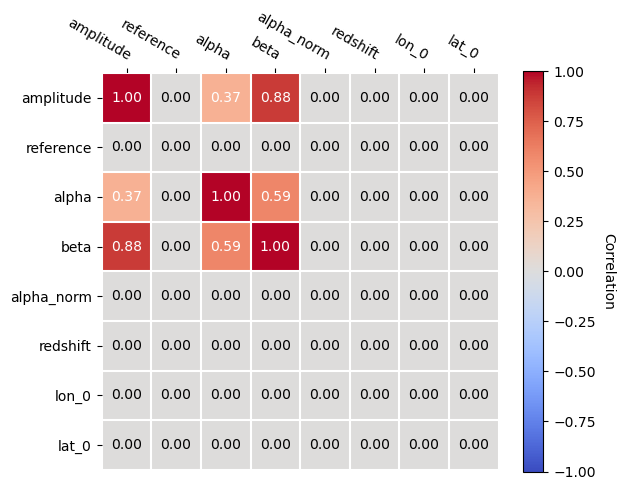

In [19]:
analysis.final_model.covariance.plot_correlation()

In [20]:
if len(analysis.final_model.parameters)> 3:
    nrow = int(np.sqrt(len(analysis.final_model.parameters)))
    ncol = int(np.ceil(len(analysis.final_model.parameters)/nrow))
else:
    ncol = len(analysis.final_model.parameters)
    nrow = 1
print(ncol, nrow)

4 2


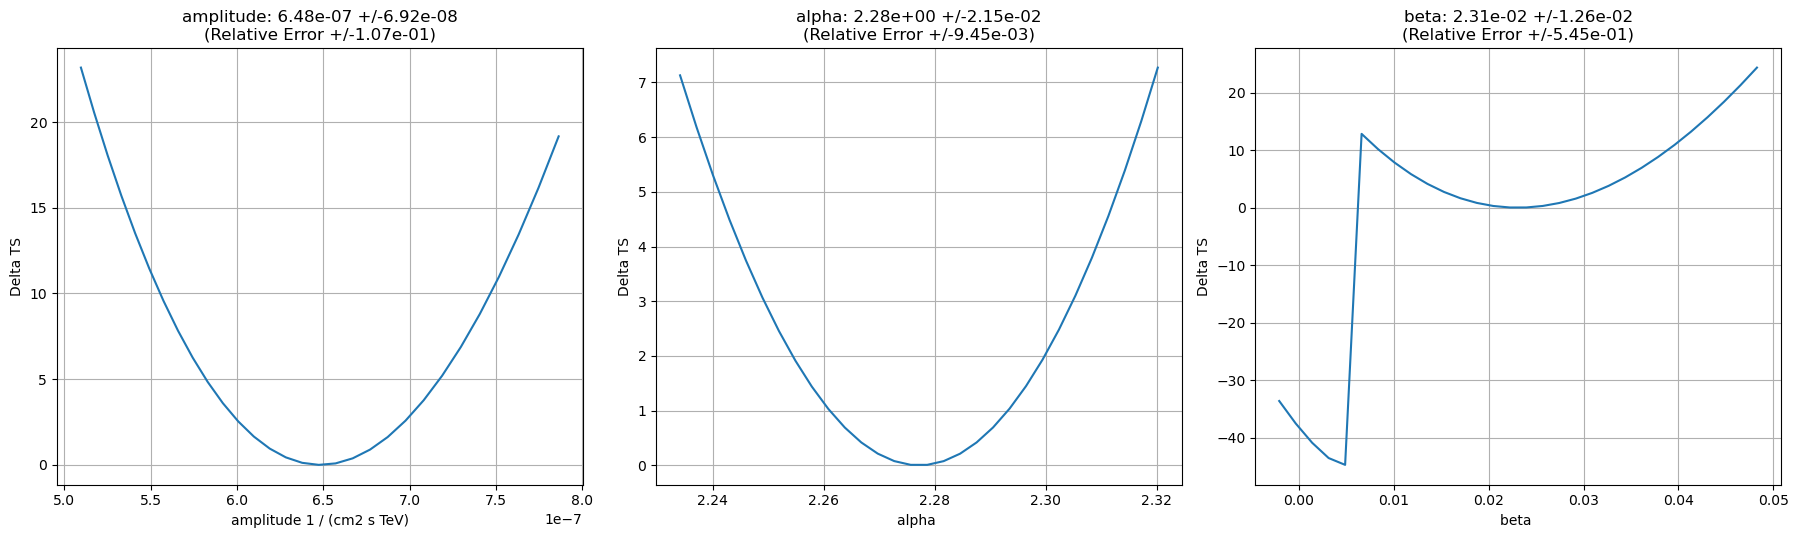

In [21]:
plt.figure(figsize=(ncol*6, nrow*5))
total_stat = analysis.fit_result.total_stat

for i, par in enumerate(analysis.final_model.parameters.free_parameters):
    par.scan_n_values = 30
    
    idx = analysis.final_model.parameters.index(par)
    name = analysis.final_model.parameters_unique_names[idx]
    
    profile = analysis.fit.stat_profile(datasets=analysis.datasets, parameter=par)
    
    plt.subplot(nrow, ncol, i+1)
    plt.plot(profile[f"{name}_scan"], profile["stat_scan"] - total_stat)
    
    plt.xlabel(f"{par.name} {par.unit}")
    plt.ylabel("Delta TS")
    plt.grid()
    if par.value != 0:
        plt.title(f"{par.name}: {par.value:.2e} +/-{par.error:.2e}\n(Relative Error +/-{par.error/par.value:.2e})")
    else:
        plt.title(f"{par.name}: {par.value:.2e} +/-{par.error:.2e}")
plt.tight_layout()

In [22]:
for fp in analysis.flux_points:
    print(fp)

FluxPoints
----------

  geom                   : RegionGeom
  axes                   : ['lon', 'lat', 'energy']
  shape                  : (1, 1, 21)
  quantities             : ['norm', 'norm_err', 'norm_errn', 'norm_errp', 'norm_ul', 'ts', 'npred', 'npred_excess', 'stat', 'counts', 'success', 'stat_scan']
  ref. model             : compound
  n_sigma                : 1
  n_sigma_ul             : 2
  sqrt_ts_threshold_ul   : 2
  sed type init          : likelihood

FluxPoints
----------

  geom                   : RegionGeom
  axes                   : ['lon', 'lat', 'energy']
  shape                  : (1, 1, 15)
  quantities             : ['norm', 'norm_err', 'norm_errn', 'norm_errp', 'norm_ul', 'ts', 'npred', 'npred_excess', 'stat', 'counts', 'success', 'stat_scan']
  ref. model             : compound
  n_sigma                : 1
  n_sigma_ul             : 2
  sqrt_ts_threshold_ul   : 2
  sed type init          : likelihood



In [23]:
analysis.flux_points[0].to_table(formatted=True, sed_type="e2dnde")

e_ref,e_min,e_max,e2dnde,e2dnde_err,e2dnde_errp,e2dnde_errn,e2dnde_ul,ts,sqrt_ts,npred,npred_excess,stat,is_ul,counts,success,norm_scan,stat_scan
MeV,MeV,MeV,MeV2 / (cm2 s TeV),MeV2 / (cm2 s TeV),MeV2 / (cm2 s TeV),MeV2 / (cm2 s TeV),MeV2 / (cm2 s TeV),,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[1],float32[1],float64,bool,float64[1],bool,float64[11],float64[11]
189.531,150.356,238.912,1.474e+02,1.562e+01,1.618e+01,1.507e+01,1.809e+02,8752.390,93.554,88.9966731390206,88.99667,10934.712,False,171.0,True,0.200 .. 5.000,11091.163 .. 11302.215
301.159,238.912,379.624,1.124e+02,1.427e+01,1.488e+01,1.367e+01,1.433e+02,6109.395,78.163,62.01013657720671,62.01013,8051.503,False,123.0,True,0.200 .. 5.000,8138.523 .. 8422.001
478.532,379.624,603.211,1.051e+02,1.603e+01,1.685e+01,1.522e+01,1.405e+02,4083.306,63.901,43.008365442897784,43.008366,5702.681,False,85.0,True,0.200 .. 5.000,5762.484 .. 5963.035
760.374,603.211,958.485,1.194e+02,2.019e+01,2.135e+01,1.907e+01,1.645e+02,3343.254,57.821,34.97711691916337,34.977116,3909.889,False,63.0,True,0.200 .. 5.000,3969.436 .. 4063.335
1208.213,958.485,1523.005,9.821e+01,2.197e+01,2.365e+01,2.038e+01,1.491e+02,1880.297,43.362,19.978591312737127,19.97859,3415.648,False,46.0,True,0.200 .. 5.000,3445.946 .. 3522.199
1919.815,1523.005,2420.012,1.256e+02,3.045e+01,3.297e+01,2.804e+01,1.967e+02,1628.773,40.358,16.999467132785636,16.999468,1249.458,False,25.0,True,0.200 .. 5.000,1284.469 .. 1299.965
3050.531,2420.012,3845.329,9.320e+01,3.296e+01,3.699e+01,2.922e+01,1.757e+02,758.674,27.544,7.99072623136042,7.9907265,738.006,False,13.0,True,0.200 .. 5.000,751.837 .. 772.074
4847.207,3845.329,6110.118,1.691e+02,5.637e+01,6.280e+01,5.029e+01,3.082e+02,791.739,28.138,8.999790695148006,8.99979,589.812,False,12.0,True,0.200 .. 5.000,616.320 .. 598.357


In [24]:
analysis.flux_points[1].to_table(formatted=True, sed_type="e2dnde")

e_ref,e_min,e_max,e2dnde,e2dnde_err,e2dnde_errp,e2dnde_errn,e2dnde_ul,ts,sqrt_ts,npred,npred_excess,stat,is_ul,counts,success,norm_scan,stat_scan
TeV,TeV,TeV,TeV / (cm2 s),TeV / (cm2 s),TeV / (cm2 s),TeV / (cm2 s),TeV / (cm2 s),,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[1],float32[1],float64,bool,float64[1],bool,float64[11],float64[11]
0.013,0.010,0.016,1.640e-11,1.640e-11,2.226e-11,1.323e-11,7.387e-11,1.386,1.177,0.9999160465874185,0.999916,0.000,True,1.0,True,0.200 .. 5.000,0.082 .. 29.192
0.020,0.016,0.025,2.423e-11,3.560e-11,3.558e-11,nan,9.538e-11,0.464,0.681,39036.02425169969,190.04839,0.000,True,39036.0,True,0.200 .. 5.000,0.147 .. 45.633
0.032,0.025,0.040,3.586e-11,1.707e-11,1.714e-11,1.714e-11,7.003e-11,4.346,2.085,494947.43530110887,2078.8562,0.000,False,494944.0,True,0.200 .. 5.000,2.416 .. 124.881
0.050,0.040,0.063,3.671e-11,8.276e-12,8.285e-12,8.285e-12,5.325e-11,19.602,4.427,569191.6757675471,4717.338,0.000,False,569190.0,True,0.200 .. 5.000,12.348 .. 338.743
0.079,0.063,0.100,3.801e-11,5.868e-12,5.880e-12,5.880e-12,4.977e-11,41.786,6.464,363399.0271768959,5490.0537,0.000,False,363399.0,True,0.200 .. 5.000,29.665 .. 359.997
0.126,0.100,0.158,2.402e-11,3.472e-12,3.468e-12,3.468e-12,3.096e-11,47.966,6.926,141701.00381419482,3663.0076,0.000,False,141701.0,True,0.200 .. 5.000,32.535 .. 557.080
0.200,0.158,0.251,1.123e-11,1.678e-12,1.678e-12,1.678e-12,1.459e-11,44.817,6.695,39112.03442785598,1850.0673,0.000,False,39112.0,True,0.200 .. 5.000,28.583 .. 725.116
0.316,0.251,0.398,3.176e-12,7.370e-13,7.371e-13,7.370e-13,4.650e-12,18.569,4.309,9541.003815264678,586.0074,0.000,False,9541.0,True,0.200 .. 5.000,10.941 .. 423.445


Text(0.5, 1.0, 'TS Profiles')

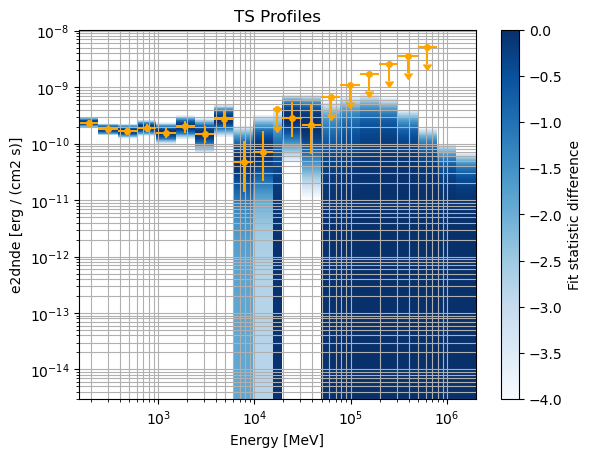

In [25]:
analysis.flux_points[0].plot_ts_profiles(sed_type="e2dnde")
analysis.flux_points[0].plot(sed_type="e2dnde", color="orange")

plt.grid(which='both')
plt.title('TS Profiles')

Text(0.5, 1.0, 'TS Profiles')

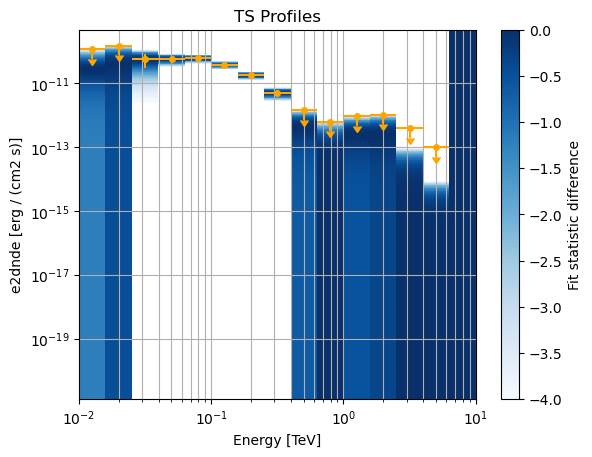

In [26]:
analysis.flux_points[1].plot_ts_profiles(sed_type="e2dnde")
analysis.flux_points[1].plot(sed_type="e2dnde", color="orange")

plt.grid(which='both')
plt.title('TS Profiles')

In [27]:
e_plot_min = 70 * u.MeV
e_plot_max = 70 * u.TeV

sed_kwargs = {
    "sed_type": "e2dnde",
    "energy_bounds": [e_plot_min, e_plot_max]
}
sed_plot_kwargs = {
    "sed_type": "e2dnde",
}

In [28]:
# Calculate & plot Crab reference flux
# https://doi.org/10.1016/j.jheap.2015.01.002
crab = create_crab_spectral_model("magic_lp")
crab.amplitude.error = 0.03e-11 * u.Unit("cm-2 s-1 TeV-1")
crab.alpha.error = 0.01
crab.beta.error = 0.01/np.log(10)

#flux_crab, flux_crab_error = crab.integral_error(e_lc_min, e_lc_max)
#print(flux_crab, flux_crab_error)

(1e-15, 1e-08)

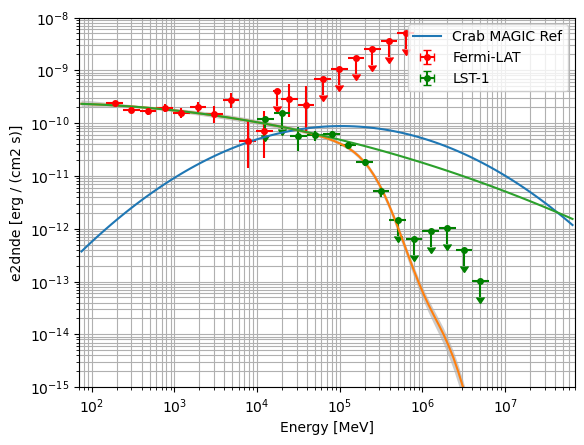

In [29]:
analysis.flux_points[0].plot(sed_type="e2dnde", color="red", label="Fermi-LAT")
analysis.flux_points[1].plot(sed_type="e2dnde", color="green", label="LST-1")

create_crab_spectral_model("magic_lp").plot(
    **sed_kwargs, label="Crab MAGIC Ref"
)
analysis.final_model[0].spectral_model.plot(**sed_kwargs)
analysis.final_model[0].spectral_model.model1.plot(**sed_kwargs)
analysis.final_model[0].spectral_model.plot_error(**sed_kwargs)

plt.grid(which="both")
plt.legend()
plt.xlim(e_plot_min, e_plot_max)
plt.ylim(1e-15, 1e-8)